<a href="https://www.kaggle.com/code/lamisamari/car-price-prediction?scriptVersionId=255511110" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/Car_Price_Prediction.csv


# Car Pricing prediction linear and logistic regression
### About the Dataset
 This project aims to predict the selling price of used cars
based on their specifications such as make, model, year, engine size,
mileage, fuel type, and transmission type.

### Key Tasks

1. Explore the data (EDA)
2. Preprocess and prepare features
3. Train regression models
4. Evaluate model performance

##  Dataset Source
[car pricing dataset link](https://www.kaggle.com/datasets/amjadzhour/car-price-prediction/data?select=Car_Price_Prediction.csv)

This dataset contains detailed information about used cars

## Imports and setup

In [2]:
import pandas as pd            # Data manipulation and analysis
import numpy as np             # Numerical operations
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns          # Statistical visualizations
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Encoding & Scaling
from sklearn.linear_model import LinearRegression     # Regression model
from sklearn.tree import DecisionTreeRegressor        # Tree-based model
from sklearn.ensemble import RandomForestRegressor    # Ensemble model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Evaluation metrics

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)


## Load the data

In [3]:
df=pd.read_csv('/kaggle/input/car-price-prediction/Car_Price_Prediction.csv')

## Quick Dataset Check

In [4]:
# display 5 rows 
df.head(5)


,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [5]:
df.shape

(1000, 8)

In [6]:
print("Dataset Info:")
df.info()

print("\nBasic Statistics:")
display(df.describe())

print("\nColumn Names:")
display(df.columns)

print("\nMissing Values:")
display(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB

Basic Statistics:


,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635



Column Names:


Index(['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')


Missing Values:


Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

## Exploratory Data Analysis (EDA)

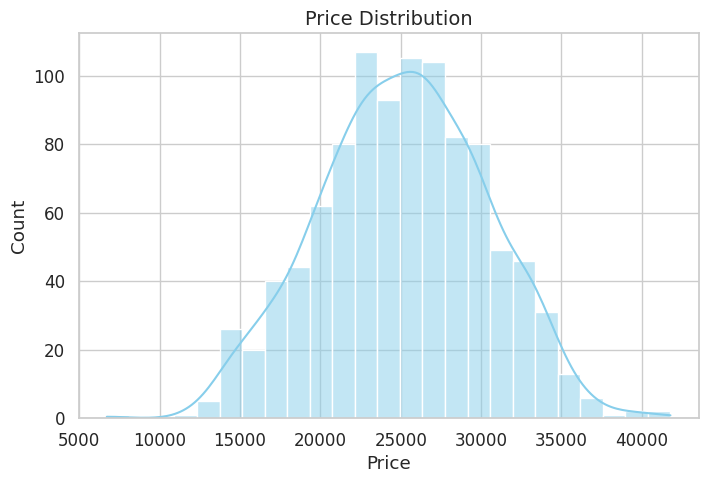

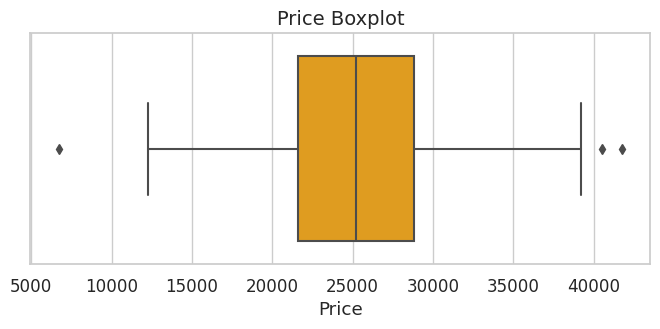

In [7]:
# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title("Price Distribution", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Boxplot for Price (to check outliers)
plt.figure(figsize=(8,3))
sns.boxplot(x=df['Price'], color='orange')
plt.title("Price Boxplot", fontsize=14)
plt.show()

**Observation:**
- Most cars are priced between 18,000 and 30,000.
- The distribution is fairly symmetrical and bell-shaped, with fewer cars at very low (<15,000) or very high (>35,000) prices.
- Outliers are minimal, with very few cars priced above 40,000 or below 10,000.

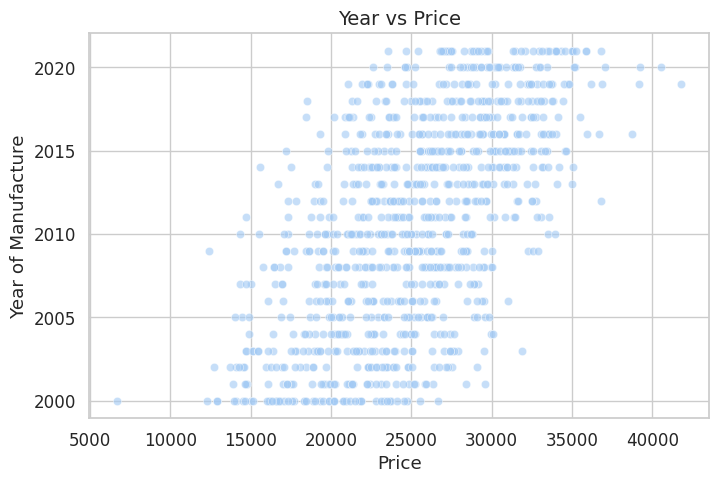

In [8]:
# Year vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Price', y='Year', alpha=0.6)
plt.title("Year vs Price", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Year of Manufacture")
plt.show()

**Observation:**
- Newer cars (manufactured after 2015) generally have higher prices, often above 25,000.
- Older cars (2000–2010) are mostly priced below 25,000.
- There is a clear positive correlation: as the year of manufacture increases, the price tends to increase.
- A few newer cars are priced unusually low, which might indicate high mileage or lower specifications.

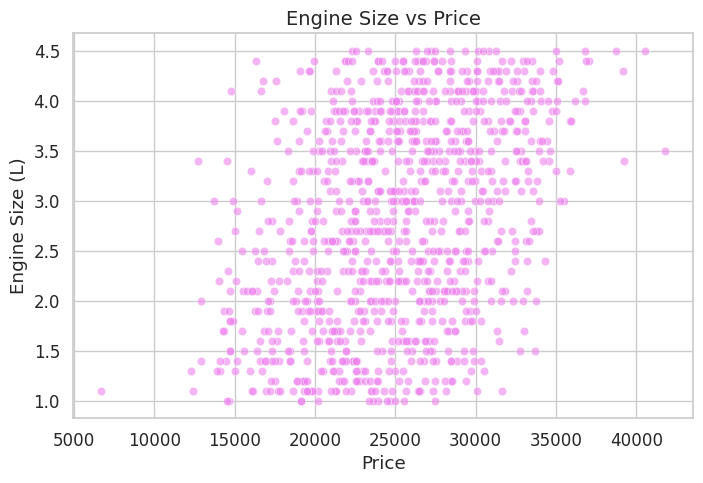

In [9]:
# Engine Size vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Price', y='Engine Size', alpha=0.6, color='violet')
plt.title("Engine Size vs Price", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Engine Size (L)")
plt.show()

**Observation:**
- Cars with larger engines (above 3.0L) tend to have higher prices, often exceeding 30,000.
- Most cars fall in the 1.5L to 3.0L engine range, with prices clustered between 20,000 and 30,000.
- There is a mild positive relationship: higher engine size generally corresponds to higher prices, though the trend is less pronounced than with car year.
- A few large-engine cars are priced relatively low, possibly due to age, mileage, or other factors.

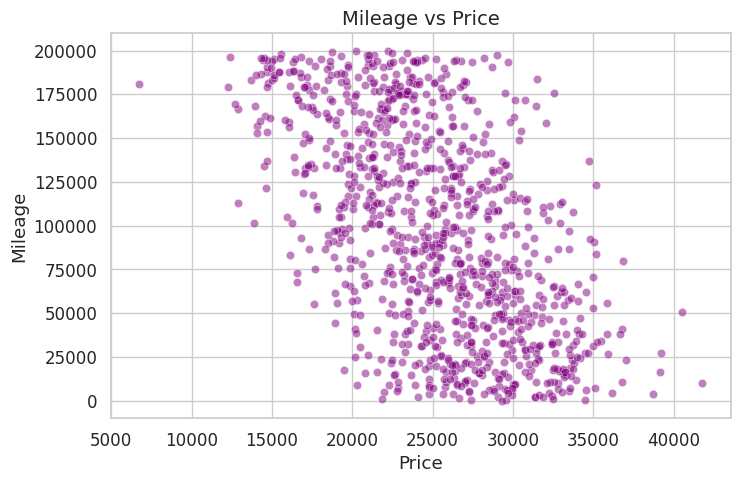

In [10]:
# Mileage vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Price', y='Mileage', alpha=0.5, color='purple')
plt.title("Mileage vs Price", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.show()


*Observation:**
- Cars with lower mileage tend to have significantly higher prices, reflecting their better condition and lower wear.
- As mileage increases, prices generally decrease, showing a clear negative correlation between the two variables.
- Most high-priced cars have mileage well below the upper range, while cars with very high mileage are almost all priced under 20,000.
- A few exceptions exist where cars with high mileage still have high prices, possibly due to being luxury or rare models.

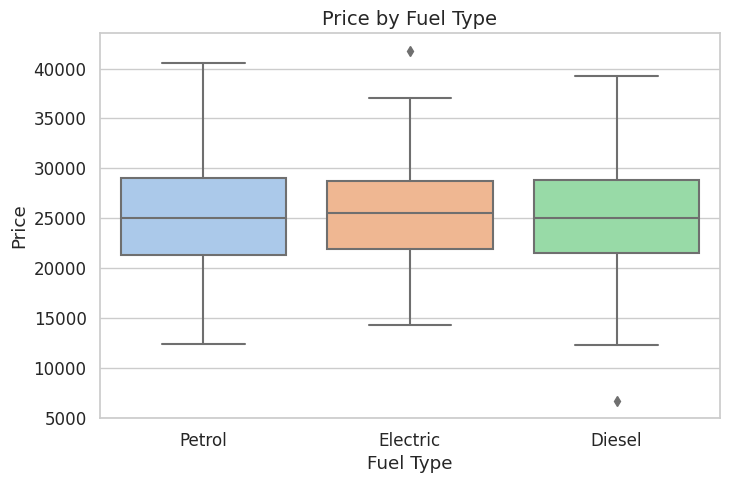

In [11]:
# Fuel Type vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Fuel Type', y='Price')
plt.title("Price by Fuel Type", fontsize=14)
plt.show()

**Observation:**
- Petrol cars generally have the highest average prices compared to other fuel types.
- Diesel cars have slightly lower average prices than petrol cars.
- Electric cars tend to have lower prices overall in this dataset, though this may be influenced by model availability or age.
- There are notable outliers for both diesel and electric cars, with some models priced significantly above the typical range for their category.

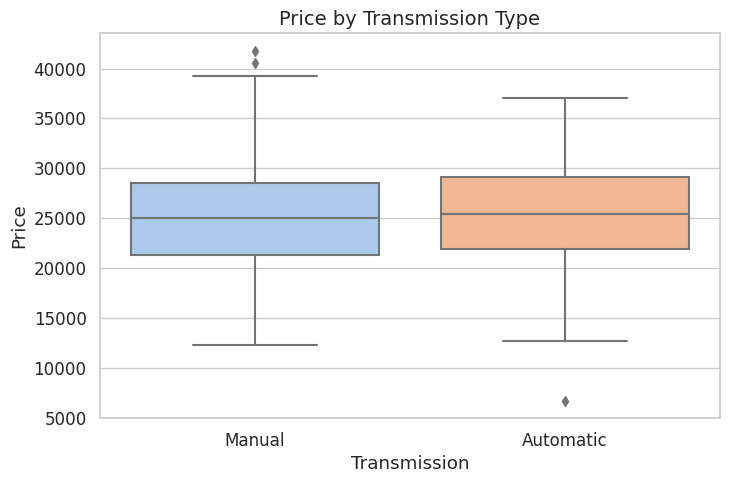

In [12]:
# Transmission vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Transmission', y='Price')
plt.title("Price by Transmission Type", fontsize=14)
plt.show()

**Observation:**
- Manual cars generally have higher average prices than automatic cars in this dataset.
- There are two notable high-price outliers for manual cars and one for automatic cars.
- While manual cars show a wider price range, automatic cars appear more concentrated in the mid-to-lower price range.

## Data Preprocessing

In [13]:
# Step 1: Outlier detection using IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Remove rows outside the bounds
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print("Shape after removing outliers:", df.shape)

Lower bound: 10760.142462737595, Upper bound: 39634.10488078541
Shape after removing outliers: (997, 8)


## Train-Test Split

### Splitting Features & Target

In [14]:
X = df.drop(columns=['Price'])  # All features
y = df['Price']                 # Target variable

### Encode Categorical Features

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Model', 'Fuel Type', 'Transmission']

# "remainder='passthrough'" means keep the other columns as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

### Scale Numerical Features

In [16]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Year', 'Engine Size', 'Mileage']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

### Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Training (Regression Models)

In [18]:
from sklearn.pipeline import Pipeline
# Create models with the same preprocessor
models = {
    "Linear Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    "Decision Tree": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    "Random Forest": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
}

## Model Evaluation

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append([name, r2, mae, rmse])

results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE"])
results_df

,Model,R² Score,MAE,RMSE
0,Linear Regression,0.841825,1751.834533,2164.398367
1,Decision Tree,0.675422,2531.494201,3100.476782
2,Random Forest,0.808376,1935.384327,2382.283145


## Conclusion & Next Steps

**Best Model**: Linear Regression achieved the highest R² Score (0.842), meaning it explained about 84% of the variance in car prices. It also had the lowest MAE (≈ 1752) and RMSE (≈ 2164), showing it makes smaller prediction errors compared to others.

**Random Forest** performed well but slightly worse than Linear Regression in both accuracy and error metrics. It might still be useful if the dataset is more complex or non-linear, but here it seems overfitting less than Decision Tree yet not surpassing Linear Regression.

**Decision Tree** had the lowest R² (0.675) and highest errors, suggesting it overfits or fails to generalize well on this dataset.